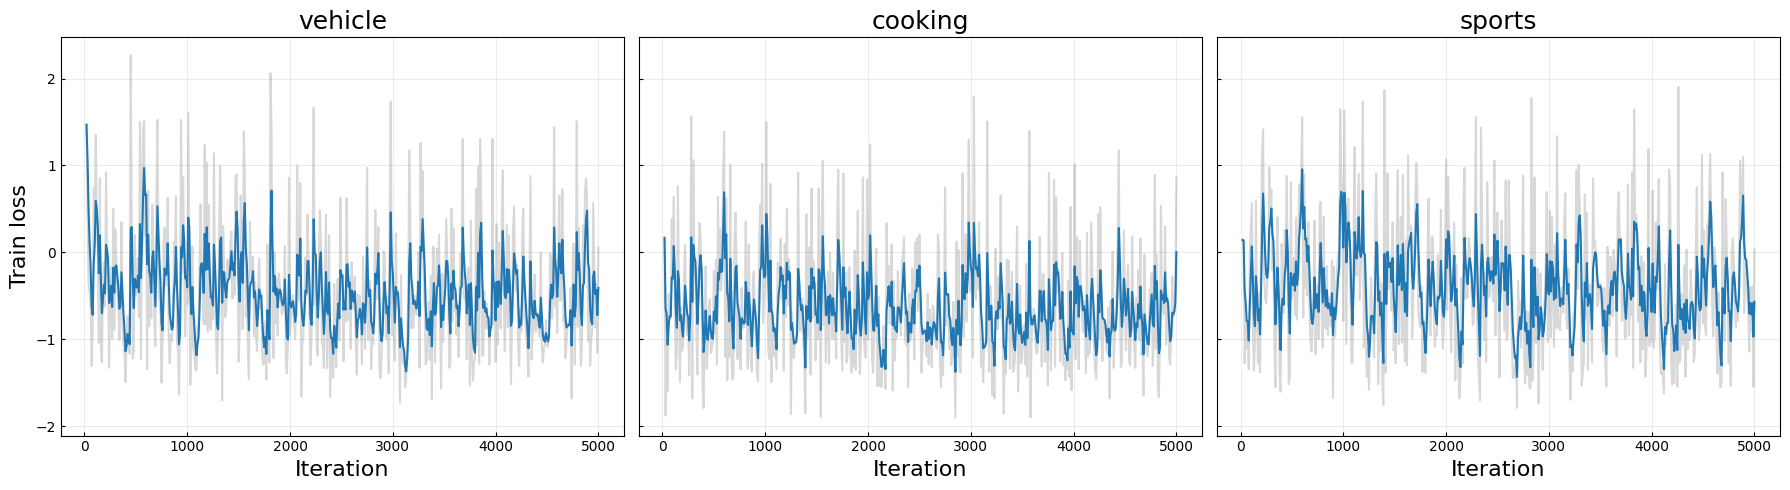

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def smooth_curve(values, smooth):
    """TensorBoardと同様の指数移動平均でスムージング"""
    if smooth <= 0:
        return values
    smoothed = []
    last = values[0]
    for v in values:
        last = last * smooth + (1 - smooth) * v
        smoothed.append(last)
    return np.array(smoothed)

# ルートフォルダを指定
root_dir = "/workspace/posttraining_logs/text2world_7b_lora_panda70m_" + \
            "r8_iter5000_bs1_accum2_scale2.0_lr0.0001_seed0"

categories = ['vehicle', 'cooking', 'sports']

# スムージングパラメータ（0:スムージングなし, 1:最大スムージング）
smooth = 0.6

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for idx, category in enumerate(categories):
    csv_path = os.path.join(root_dir, category, "loss_history.csv")
    df = pd.read_csv(csv_path, comment='/')
    x = df["iteration"]
    y = df["loss"]
    y_smooth = smooth_curve(y.values, smooth)

    # 元の線（薄め）
    axes[idx].plot(x, y, label=f"{category} (raw)", color='gray', alpha=0.3)
    # スムージング線（濃いめ）
    axes[idx].plot(x, y_smooth, label=f"{category} (smoothed)", color='C0')
    axes[idx].set_title(category, fontsize=18)
    axes[idx].set_xlabel("Iteration", fontsize=16)
    if idx == 0:
        axes[idx].set_ylabel("Train loss", fontsize=16)
    axes[idx].grid(True, color='gray', alpha=0.15)
    axes[idx].tick_params(axis='both', direction='in', length=3)
    # axes[idx].legend()

plt.tight_layout()